In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('isear.csv')

emotion                                                     joy
essay         [ Cycling in the spring sunshine gives me such...
Unnamed: 2                                                  NaN
Name: 377, dtype: object


In [3]:
class_distribution = df['emotion'].value_counts()
print("Distribusi Kelas :")
print(class_distribution)

Distribusi Kelas :
joy        1080
anger      1077
fear       1072
disgust    1062
shame      1058
sadness    1052
guilt      1045
Name: emotion, dtype: int64


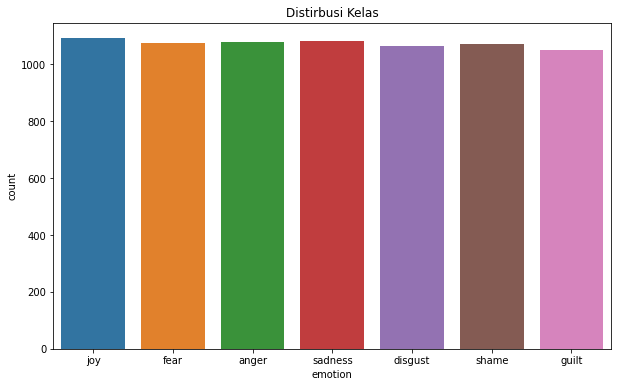

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion')
plt.title('Distirbusi Kelas')
plt.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply the text cleaning function to the 'essay' column
df = df.drop_duplicates(subset='essay')
df['essay'] = df['essay'].apply(clean_text)



[nltk_data] Downloading package stopwords to /home/acrig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.to_csv('cleaned_isear.csv', index=False)